+-------+-----------------+
|summary|            Price|
+-------+-----------------+
|  count|               50|
|   mean|           238.34|
| stddev|145.3659154951913|
|    min|               16|
|    max|              499|
+-------+-----------------+

Outliers in Price:
+----------+------------+--------+-----+
|Product_ID|Product_Name|Category|Price|
+----------+------------+--------+-----+
+----------+------------+--------+-----+

Tabular Data:
+----------+------------+---------------+-----+
|Product_ID|Product_Name|       Category|Price|
+----------+------------+---------------+-----+
|         1|      Laptop|    Electronics|  423|
|         2|  Smartphone|    Electronics|  174|
|         3|  Headphones|    Electronics|  406|
|         4|      Camera|    Electronics|  248|
|         5|  Television|    Electronics|   22|
|         6|     T-Shirt|       Clothing|   95|
|         7|       Jeans|       Clothing|  317|
|         8|    Sneakers|       Clothing|  179|
|         9|       Dr

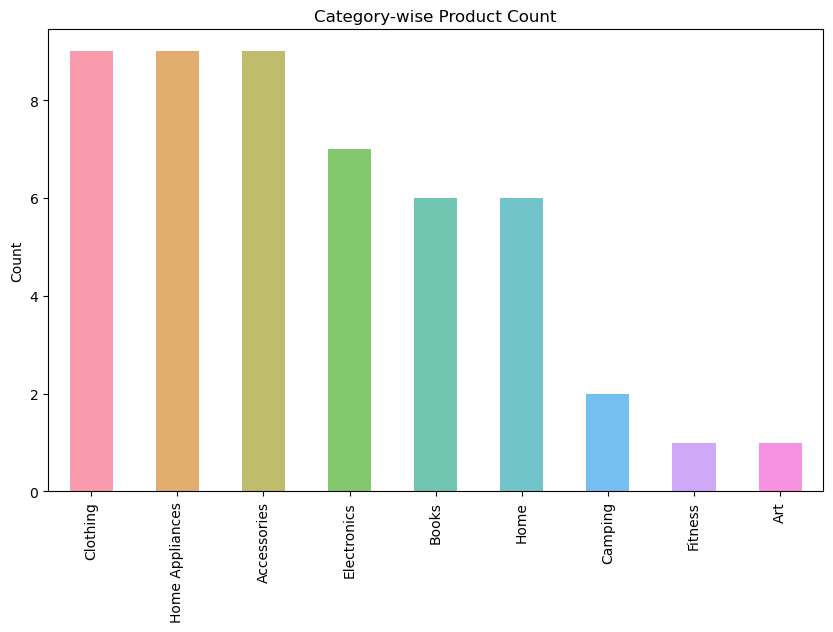

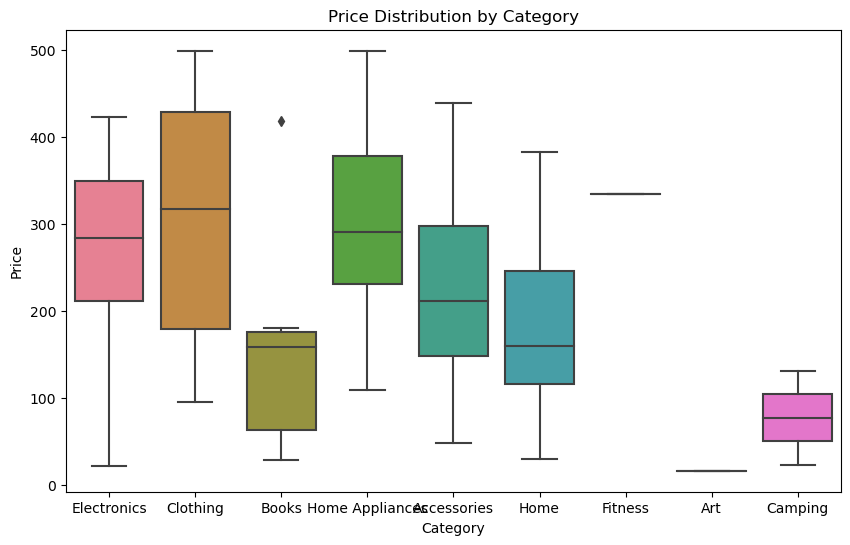

In [4]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

class ProductDataReport:
    def __init__(self, spark_session, data_path):
        self.spark = spark_session
        self.data_path = data_path

    def load_data(self):
        return self.spark.read.csv(self.data_path, header=True, inferSchema=True)

    def preprocess_data(self, data):
        # Handle null values for numerical attribute 'Price'
        data = data.na.fill({'Price': data.select(F.mean('Price')).collect()[0][0]})
        return data

    def describe_price(self, data):
        # Profile numerical attribute 'Price'
        data.select('Price').describe().show()

    def find_outliers(self, data):
        # Explain outliers for numerical attribute 'Price'
        outliers = data.filter(F.col('Price') > 1000)
        print("Outliers in Price:")
        outliers.show()

    def visualize_data(self, data):
        # Print tabular data
        print("Tabular Data:")
        data.show()

        # Plot Category-wise Product Count
        category_counts = data.toPandas()['Category'].value_counts()

        # Specify different colors for each category
        category_colors = sns.color_palette('husl', n_colors=len(category_counts))

        plt.figure(figsize=(10, 6))
        category_counts.plot(kind='bar', color=category_colors, alpha=0.7)
        plt.title('Category-wise Product Count')
        plt.ylabel('Count')
        plt.show()

        # Plot Price Distribution by Category
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Category', y='Price', data=data.toPandas(), palette=category_colors)
        plt.title('Price Distribution by Category')
        plt.show()

# Example of usage
spark = SparkSession.builder.appName("ProductDataJob").getOrCreate()
product_data_report = ProductDataReport(spark, '/home/raja/Documents/MS-DATA-SCIENCE/Fall-2023/Big-Data-Project/ProductData_data.csv')
product_data = product_data_report.load_data()
product_data = product_data_report.preprocess_data(product_data)
product_data_report.describe_price(product_data)
product_data_report.find_outliers(product_data)
product_data_report.visualize_data(product_data)
